# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [252]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [253]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [254]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [255]:
print(f'Dataset has: {df_apps.shape[0]} rows')
print(f'Dataset has: {df_apps.shape[1]} columns')

Dataset has: 10841 rows
Dataset has: 12 columns


In [256]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [257]:
# method will give us n random rows
df_apps.sample(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
2716,BW Smart,TOOLS,3.70,50,19.00,"5,000",Free,0,Everyone,Tools,"June 6, 2017",4.0 and up
7609,DraftKings - Daily Fantasy Sports,SPORTS,4.50,50017,41.00,"1,000,000",Free,0,Adults only 18+,Sports,"July 24, 2018",4.4 and up
4966,Emmanuella Funny Videos 2018,COMICS,4.50,314,6.10,"100,000",Free,0,Everyone,Comics,"May 23, 2018",4.1 and up
25,Kay AH GA,MEDICAL,NaN,0,29.00,1,Free,0,Everyone,Medical,"February 15, 2018",4.0.3 and up
10218,Racing in Car 2,GAME,4.30,234589,38.00,"50,000,000",Free,0,Everyone,Racing,"November 22, 2016",2.3.3 and up
2448,CG Freelancer,NEWS_AND_MAGAZINES,4.70,10,2.30,"1,000",Free,0,Everyone,News & Magazines,"July 30, 2014",4.1 and up
2735,Scratch-Off Guide for FL Lotto,FAMILY,4.60,25,5.60,"5,000",Free,0,Everyone,Entertainment,"July 4, 2018",4.0.3 and up
5925,English Grammar Complete Handbook,BOOKS_AND_REFERENCE,4.60,1435,2.80,"500,000",Free,0,Everyone,Books & Reference,"January 21, 2018",4.0 and up
9889,Equestria Girls,FAMILY,4.30,392596,53.00,"10,000,000",Free,0,Everyone,Role Playing;Action & Adventure,"July 22, 2016",4.0 and up
3303,Gold Wallpapers,PERSONALIZATION,4.50,43,28.00,"10,000",Free,0,Everyone,Personalization,"March 26, 2018",4.0 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [258]:
df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True) #axis = column

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [260]:
df_apps['Rating'].isna().values.sum() #IMPORTANT WAY TO FIND NA IN A COLUMN

1474

In [261]:
df_apps[df_apps['Rating'].isna()] # Rows with Rating NaN

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
5840,Em Fuga Brasil,FAMILY,NaN,1317,60.00,"100,000",Free,0,Everyone,Simulation
5862,Voice Tables - no internet,PARENTING,NaN,970,71.00,"100,000",Free,0,Everyone,Parenting
6141,Young Speeches,LIBRARIES_AND_DEMO,NaN,2221,2.40,"500,000",Free,0,Everyone,Libraries & Demo
7035,SD card backup,TOOLS,NaN,142,3.40,"1,000,000",Free,0,Everyone,Tools


In [262]:
df_apps_clean = df_apps.dropna() # we dont care for those rows with no ratings 
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [263]:
duplicated_rows = df_apps_clean[df_apps_clean['App'].duplicated()] # return if the row has duplicated
duplicated_rows.shape

(1170, 10)

In [264]:
df_apps_clean[df_apps_clean['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [266]:
# Only removes one of the duplicates
df_apps_clean = df_apps_clean.drop_duplicates()
df_apps_clean[df_apps_clean['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [267]:
#Need to specify what columns to take into acount for a duplicate
df_apps_clean = df_apps_clean.drop_duplicates(['App', 'Type', 'Price'])
df_apps_clean[df_apps_clean['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [268]:
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [269]:
df_apps_clean.sort_values(by='Rating', ascending=False).head()
# The most rating apps have few reviwa it canot be trust

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [270]:
df_apps_clean.sort_values(by='Size_MBs', ascending=False).head()
# 100 MB is the maximun for an Android app in the store

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [271]:
df_apps_clean.sort_values(by='Reviews', ascending=False).head(50)
# No paid apps for the most reviews apps

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [272]:
ratings = df_apps_clean['Content_Rating'].value_counts()
ratings

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [273]:
ratings.index

Index(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+',
       'Unrated'],
      dtype='object', name='Content_Rating')

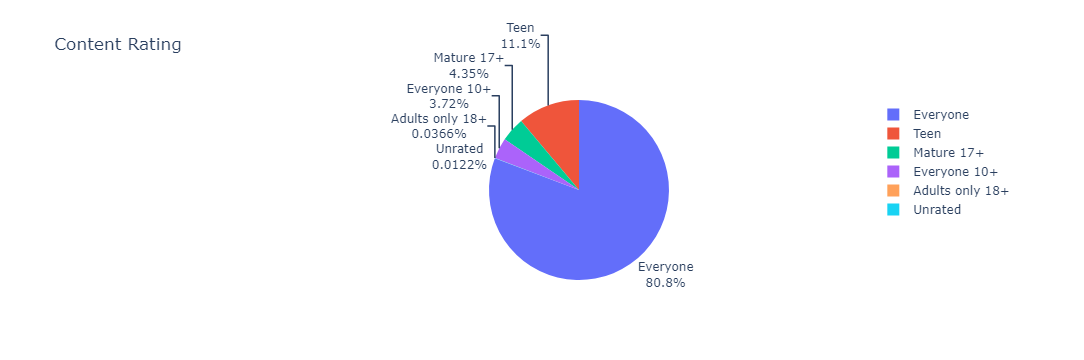

In [275]:
fig = px.pie(labels=ratings.index, values=ratings.values, title='Content Rating', names=ratings.index)
fig.update_traces(textposition='outside', textinfo='percent+label') ## configure other aspects not included in the pie()
fig.show()

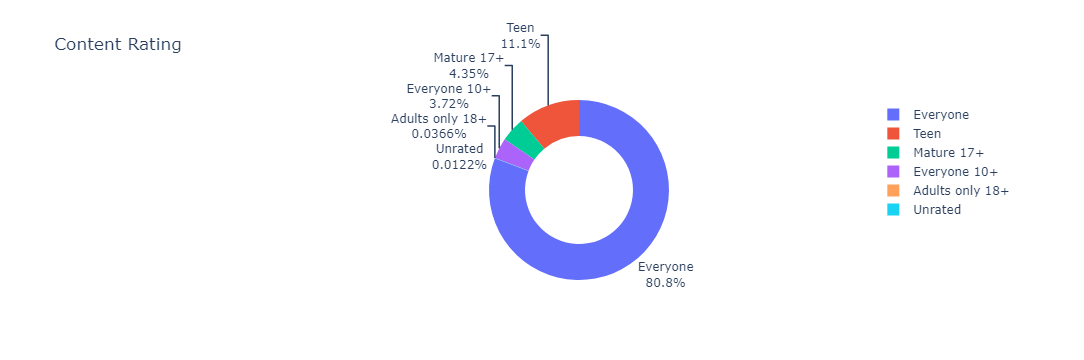

In [276]:
# To create a Donut chart we add a hole in the pie()
fig = px.pie(labels=ratings.index, values=ratings.values, title='Content Rating', names=ratings.index, hole=0.6) #hole
fig.update_traces(textposition='outside', textinfo='percent+label') ## configure other aspects not included in the pie()
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [277]:
type(df_apps_clean['Installs'].iloc[0])

str

In [278]:
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [279]:
#replace commas
df_apps_clean['Installs'] = df_apps_clean['Installs'].str.replace(',', '')
df_apps_clean.sort_values(by='Installs', ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10740,Google Translate,TOOLS,4.40,5745093,3.40,500000000,Free,0,Everyone,Tools
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,500000000,Free,0,Everyone,Tools
10777,Temple Run 2,GAME,4.30,8118609,62.00,500000000,Free,0,Everyone,Action
10776,Samsung Health,HEALTH_AND_FITNESS,4.30,480208,70.00,500000000,Free,0,Everyone,Health & Fitness
10773,Dropbox,PRODUCTIVITY,4.40,1861310,61.00,500000000,Free,0,Everyone,Productivity
...,...,...,...,...,...,...,...,...,...,...
436,Chronolink DX,FAMILY,5.00,7,73.00,10,Paid,$0.99,Everyone,Puzzle
439,Revita.bg,HEALTH_AND_FITNESS,4.80,10,4.00,10,Free,0,Everyone,Health & Fitness
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade


In [282]:
# convert to integer
df_apps_clean['Installs'] = pd.to_numeric(df_apps_clean['Installs'])
df_apps_clean.sort_values(by='Installs', ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10835,Subway Surfers,GAME,4.50,27722264,76.00,1000000000,Free,0,Everyone 10+,Arcade
10806,Instagram,SOCIAL,4.50,66577313,5.30,1000000000,Free,0,Teen,Social
10783,Google Play Books,BOOKS_AND_REFERENCE,3.90,1433233,5.70,1000000000,Free,0,Teen,Books & Reference
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,1000000000,Free,0,Everyone,Communication
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,1000000000,Free,0,Everyone,Communication
...,...,...,...,...,...,...,...,...,...,...
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade


In [283]:
type(df_apps_clean['Installs'].iloc[0])

numpy.int64

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [284]:
df_apps_clean['Price'] = df_apps_clean['Price'].str.replace('$', '')
df_apps_clean['Price'] = pd.to_numeric(df_apps_clean['Price'])
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   int64  
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   float64
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 704.6+ KB


### The most expensive apps sub $250

In [285]:
df_apps_clean.sort_values(by='Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


In [286]:
# remove the ones that the price is greater that 250 mostly the I am Rich
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [287]:
# Revenue Estimate = # of Install multiply by Price
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [288]:
# Different categories
df_apps_clean['Category'].nunique()

33

In [289]:
# get the top 10 categories with mmost apps- values counts order for greater to smaller
top10_category = df_apps_clean['Category'].value_counts()[:10]
top10_category

Category
FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

In [290]:
top10_category.index

Index(['FAMILY', 'GAME', 'TOOLS', 'PRODUCTIVITY', 'PERSONALIZATION',
       'LIFESTYLE', 'FINANCE', 'MEDICAL', 'PHOTOGRAPHY', 'BUSINESS'],
      dtype='object', name='Category')

In [291]:
top10_category.values

array([1606,  910,  719,  301,  298,  297,  296,  292,  263,  262],
      dtype=int64)

### Vertical Bar Chart - Highest Competition (Number of Apps)

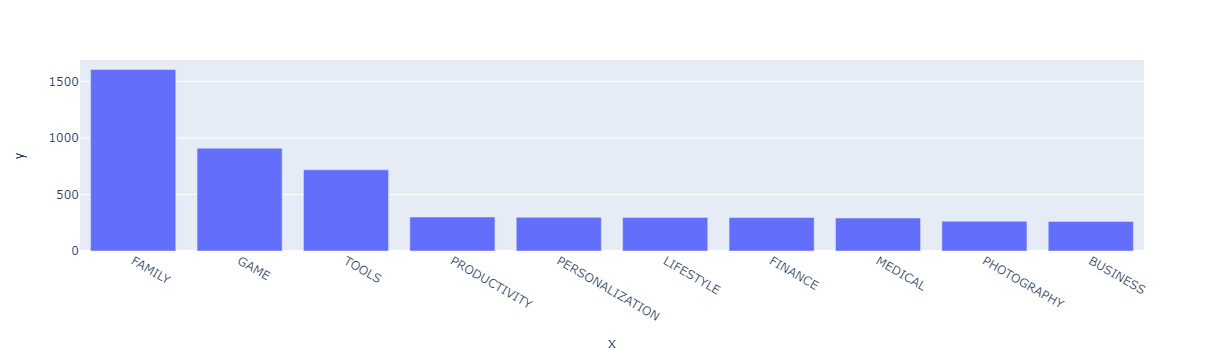

In [292]:
# Plot a vertical histogram # of apps vs Category
bar = px.bar(x=top10_category.index, y=top10_category.values)
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [293]:
# sum the installation sby category using agg
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

In [294]:
category_installs.head()

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100


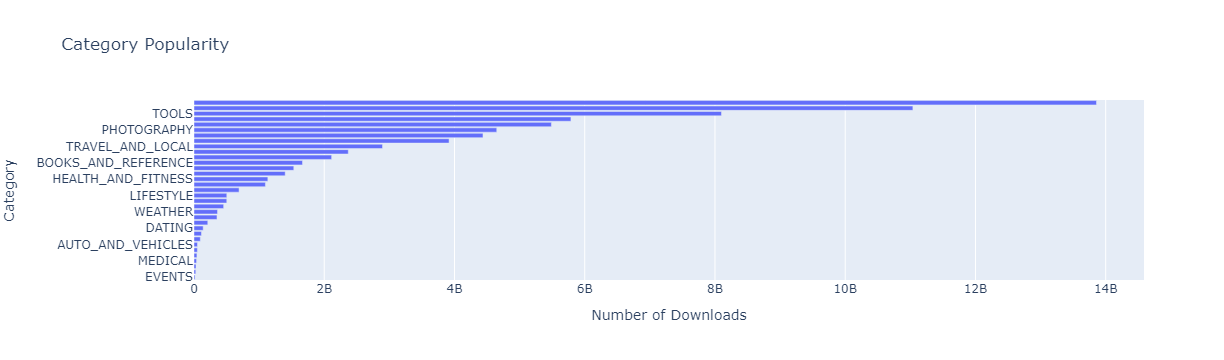

In [295]:
h_bar= px.bar(x = category_installs.Installs, y = category_installs.index, orientation='h', title='Category Popularity') #orientation
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [296]:
# agg funtion works for 2 differents columns and type of aggregation sum, count, mean etc
category_concentration = df_apps_clean.groupby('Category').agg({'App': pd.Series.count, 'Installs': pd.Series.sum})
category_concentration.sort_values(['App', 'Installs'], ascending=[True, True], inplace=True)
print(f'The dimensions of the dataFrame are: {category_concentration.shape}')
category_concentration.head()

The dimensions of the dataFrame are: (33, 2)


,App,Installs
Category,,
BEAUTY,42,26916200
EVENTS,45,15949410
PARENTING,50,31116110
COMICS,54,44931100
ART_AND_DESIGN,61,114233100


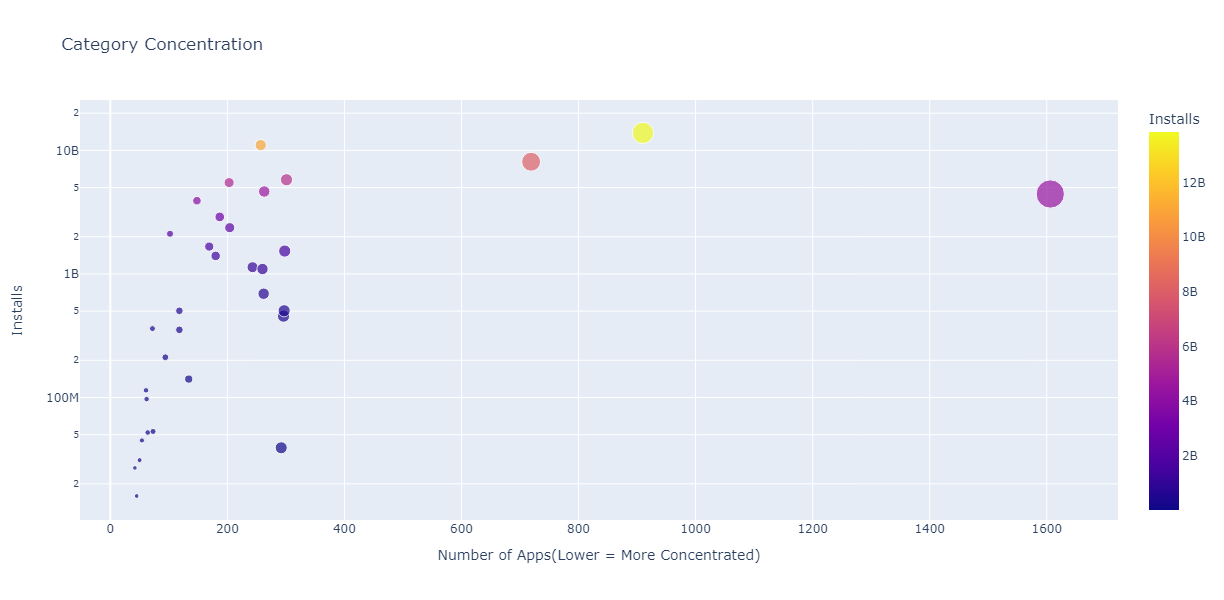

In [297]:
g_scatter = px.scatter(data_frame=category_concentration, x='App', y='Installs',  title='Category Concentration', 
                       color='Installs', size='App', hover_name=category_concentration.index, width=900, height=600)
g_scatter.update_layout(xaxis_title='Number of Apps(Lower = More Concentrated)', yaxis=dict(type='log')) #type log works to modfy the yaxis for big values
g_scatter.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [298]:
# Number of Genders
df_apps_clean['Genres'].nunique()

114

In [299]:
# multiple categories
df_apps_clean['Genres'].value_counts().sort_values(ascending=False)[:5]

Genres
Tools              718
Entertainment      467
Education          429
Productivity       301
Personalization    298
Name: count, dtype: int64

In [300]:
new_genres = df_apps_clean['Genres'].str.split(';', expand=True).stack() #expand created n values when you split and stack created the rows
new_genres[9220]

0                Arcade
1    Action & Adventure
dtype: object

In [301]:
new_genres.nunique()

53

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [303]:
stack_genres = new_genres.value_counts()[:15] #only first 15 genres
stack_genres

Tools               719
Education           587
Entertainment       498
Action              304
Productivity        301
Personalization     298
Lifestyle           298
Finance             296
Medical             292
Sports              270
Photography         263
Business            262
Communication       258
Health & Fitness    245
Casual              216
Name: count, dtype: int64

In [304]:
stack_genres.index

Index(['Tools', 'Education', 'Entertainment', 'Action', 'Productivity',
       'Personalization', 'Lifestyle', 'Finance', 'Medical', 'Sports',
       'Photography', 'Business', 'Communication', 'Health & Fitness',
       'Casual'],
      dtype='object')

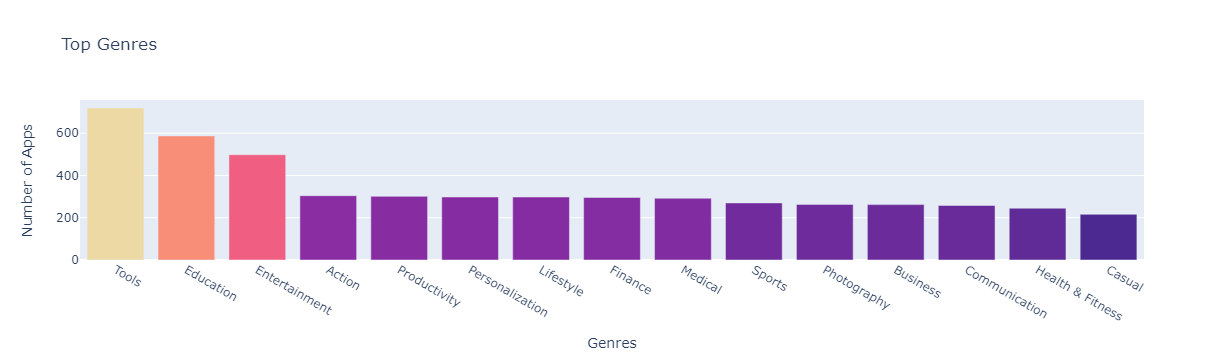

In [305]:
plot = px.bar(stack_genres, x=stack_genres.index, y=stack_genres.values, color=stack_genres.values, 
              color_continuous_scale='Agsunset', title='Top Genres', hover_name=stack_genres.index)
plot.update_layout(xaxis_title='Genres', yaxis_title='Number of Apps', coloraxis_showscale=False) #eliminate the labels 
plot.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [306]:
df_apps_clean['Type'].value_counts()

Type
Free    7595
Paid     589
Name: count, dtype: int64

In [308]:
df_free_vs_paid = df_apps_clean.groupby(['Category', 'Type'], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


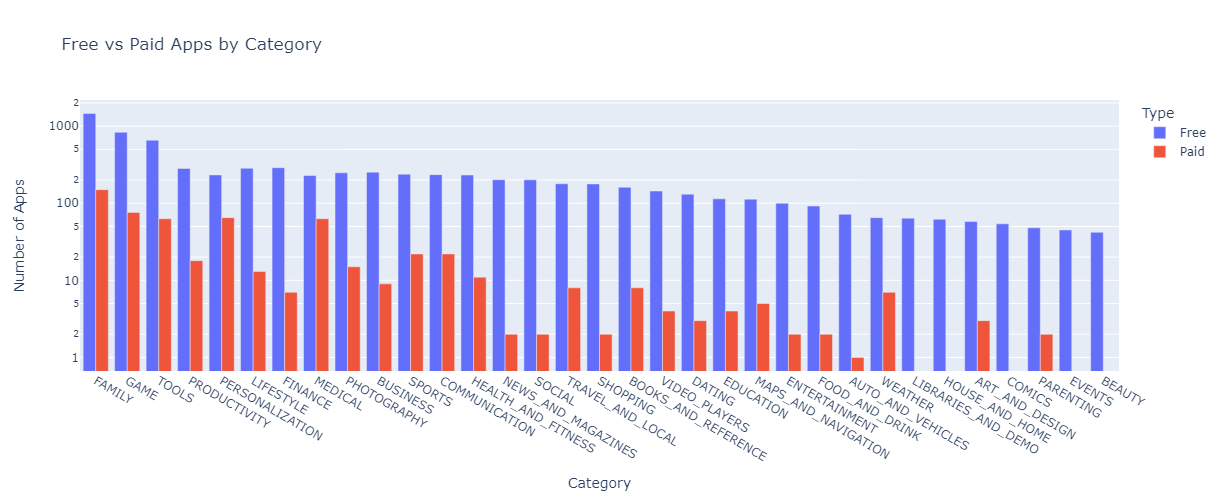

In [309]:
bar = px.bar(df_free_vs_paid, x='Category', y='App', color='Type', barmode='group', title='Free vs Paid Apps by Category', height=500)
# barmode group divdes by  2 columns, color divides by type
bar.update_layout(xaxis={'categoryorder':'total descending'}, #order for biggest to smallest
                  xaxis_title='Category', yaxis_title='Number of Apps', yaxis=dict(type='log'))

bar.show()

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


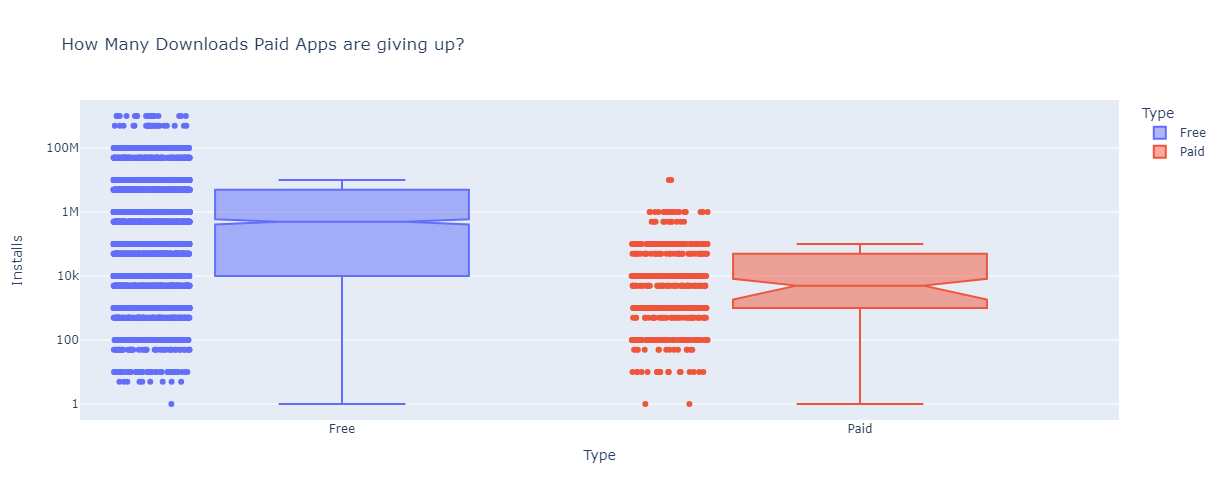

In [310]:
g_box = px.box(df_apps_clean, x='Type', y='Installs', color='Type', notched=True, height=500, points='all', title='How Many Downloads Paid Apps are giving up?')
g_box.update_layout(xaxis_title='Type', yaxis_title='Installs', yaxis=dict(type='log'))
g_box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [311]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical,0.00
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade,0.00
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical,0.00


In [312]:
# Get all apps that are paid
df_revenue = df_apps_clean[df_apps_clean['Type'] == 'Paid']
df_revenue.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
233,Chess of Blades (BL/Yaoi Game) (No VA),FAMILY,4.80,4,23.00,10,Paid,14.99,Teen,Casual,149.90
248,The DG Buddy,BUSINESS,3.70,3,11.00,10,Paid,2.49,Everyone,Business,24.90
291,AC DC Power Monitor,LIFESTYLE,5.00,1,1.20,10,Paid,3.04,Everyone,Lifestyle,30.40


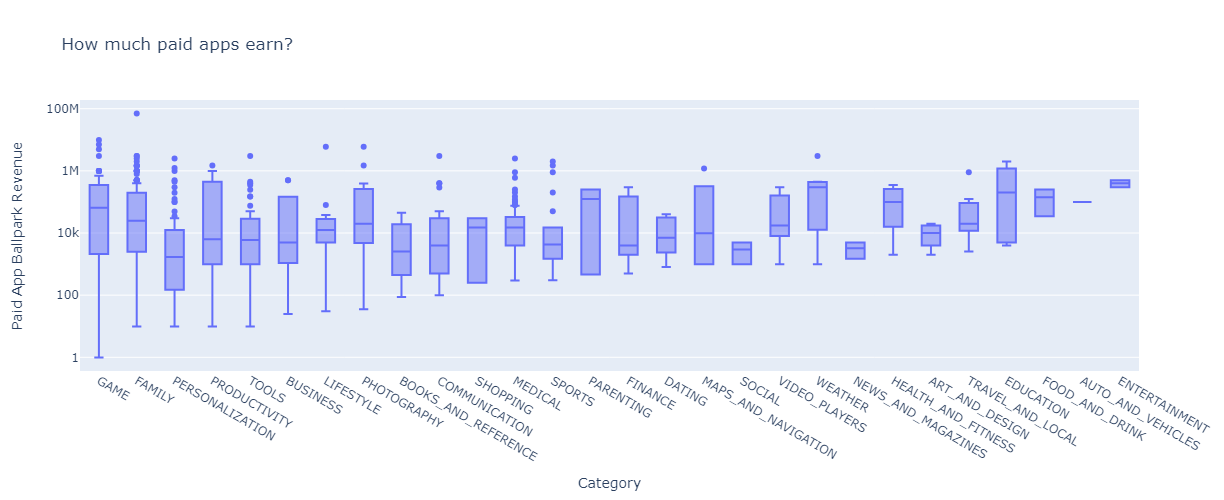

In [313]:
f_box = px.box(df_revenue, x='Category', y='Revenue_Estimate', height=500, title='How much paid apps earn?')
f_box.update_layout(xaxis={'categoryorder':'min ascending'}, # order the box plot
                  xaxis_title='Category', yaxis_title='Paid App Ballpark Revenue', yaxis=dict(type='log'))
f_box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [318]:
df_revenue.Price.median()

2.99

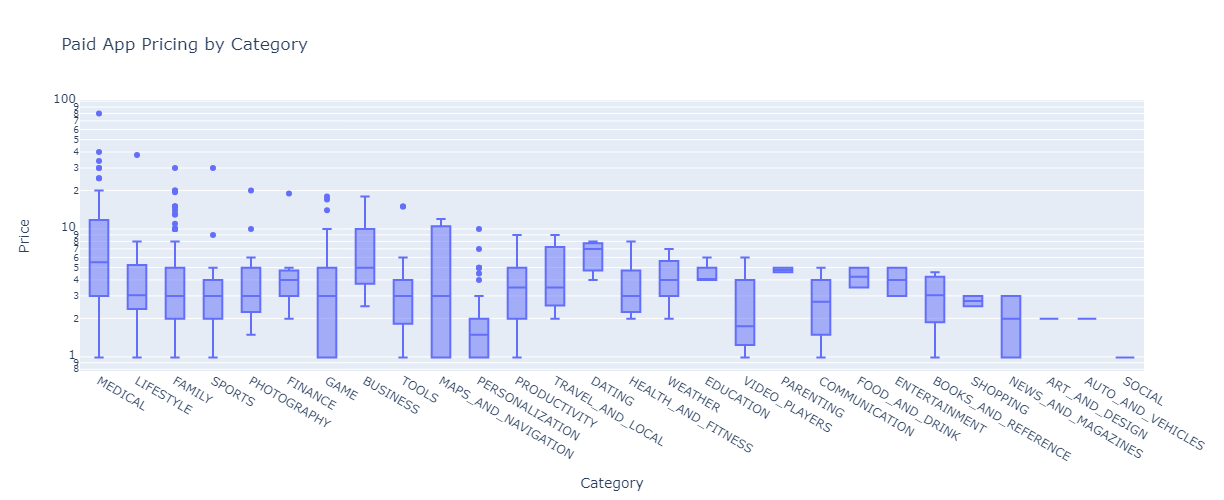

In [319]:
p_box = px.box(data_frame=df_revenue, x='Category', y='Price', title='Paid App Pricing by Category', height=500)
p_box.update_layout(xaxis={'categoryorder':'max descending'}, xaxis_title='Category', yaxis_title='Price',yaxis=dict(type='log'))
p_box.show()